In [2]:
import pandas as pd

df=pd.read_csv(r'heart.csv')

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [3]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


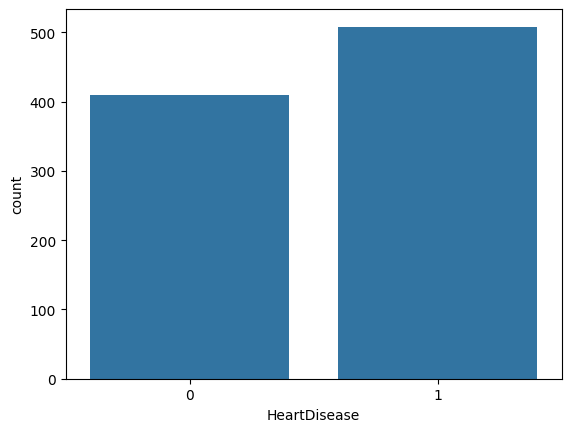

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='HeartDisease', data=df)
plt.show()

In [5]:

encoded_data = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
print(encoded_data.head())



   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False

HeartDisease    1.0
Name: HeartDisease, dtype: float64


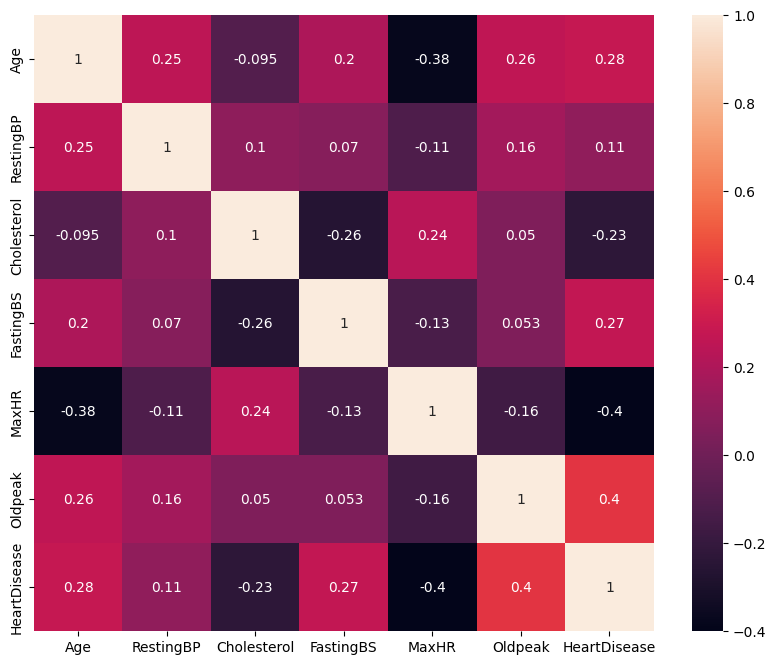

In [ ]:

corr_matrex = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrex, annot=True)

target_corr = corr_matrex['HeartDisease'].sort_values(ascending=False)

print(target_corr[target_corr.abs() > 0.5])


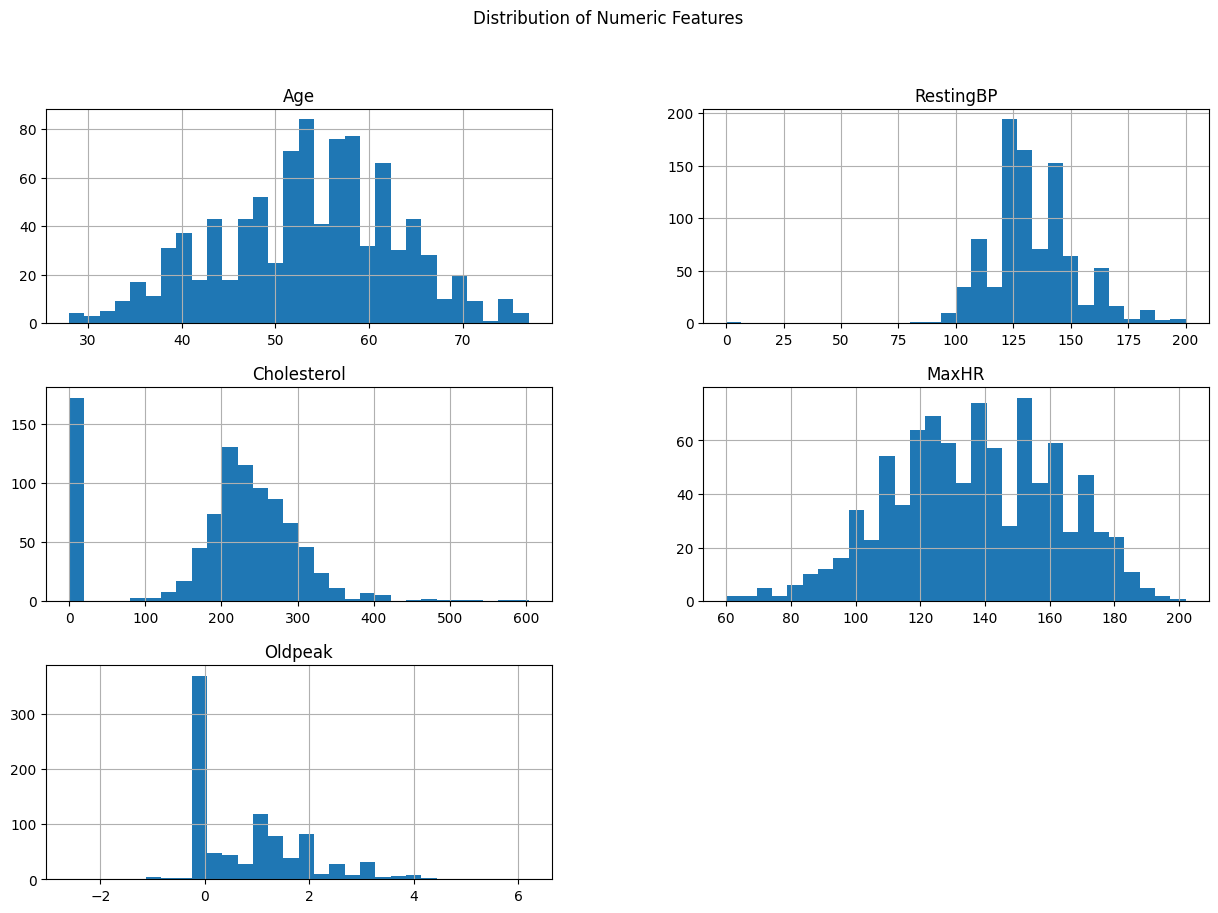

In [7]:
nmr_features = encoded_data.select_dtypes(include=['float64', 'int64']).drop(columns=['HeartDisease', 'FastingBS'])


nmr_features .hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = encoded_data.drop(columns='HeartDisease')
y = encoded_data['HeartDisease']
print(X)

x_train,x_test , y_train , y_test = train_test_split(X,y , test_size=0.3, random_state=42)
print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0     40        140          289          0    172      0.0   True   
1     49        160          180          0    156      1.0  False   
2     37        130          283          0     98      0.0   True   
3     48        138          214          0    108      1.5  False   
4     54        150          195          0    122      0.0   True   
..   ...        ...          ...        ...    ...      ...    ...   
913   45        110          264          0    132      1.2   True   
914   68        144          193          1    141      3.4   True   
915   57        130          131          0    115      1.2   True   
916   57        130          236          0    174      0.0  False   
917   38        138          175          0    173      0.0   True   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                 True              False             False   
1                False           

In [8]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=x_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=x_test.columns)
print(X_train_scaled)

          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0    0.464714  -1.772314     0.294989  -0.525682  0.774609 -0.729460   
1    0.781767  -1.234868    -1.905390   1.902289 -1.173673  0.990283   
2   -0.063707   1.452358    -1.905390   1.902289 -0.605424 -0.819972   
3    0.993136   1.452358     0.257376   1.902289 -1.295440  0.085155   
4    0.993136  -0.159978     1.197709   1.902289 -0.199532  0.809258   
..        ...        ...          ...        ...       ...       ...   
637 -0.592128  -0.697423     0.483056  -0.525682 -1.092494 -0.819972   
638 -0.909181  -0.697423     0.210359  -0.525682  0.125182 -0.819972   
639  0.676083  -0.159978     0.473652  -0.525682  0.287538  0.447206   
640  0.676083   1.022402    -1.905390  -0.525682 -0.767781 -0.819972   
641 -1.437602   0.914913     1.780715  -0.525682 -0.280710  0.990283   

        Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0    0.544949          -0.489267          -0.520852         -0

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [10]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)



GaussianNB()

In [11]:
# K-Nearest Neighbors (K=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)



KNeighborsClassifier(n_neighbors=3)

In [12]:




# Decision Tree (max_depth=6)
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train_scaled, y_train)




DecisionTreeClassifier(max_depth=6)

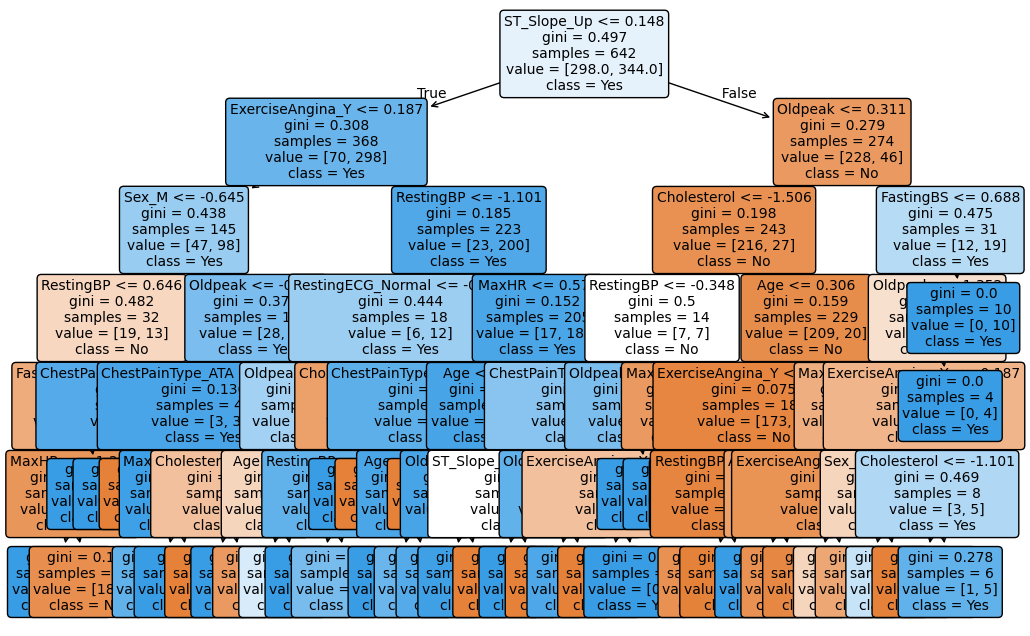

In [15]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, feature_names= X.columns,  class_names=['No', 'Yes'], rounded=True , fontsize=10)
plt.savefig("decision_tree.png")
plt.show()


In [ ]:
print(X_train_scaled.values)
print( y_train.head())

import numpy as np

class SVM_scratch:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iterss=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iterss
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition =  [idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.where(np.sign(approx) == -1, 0, 1)
    
    def predict_proba(self, X):

        # Compute raw decision function
        decision = np.dot(X, self.w) - self.b
        
        # Apply sigmoid function for probability estimation
        sigmoid = 1 / (1 + np.exp(-decision))
        
        # Probabilities for both classes
        return np.vstack((1 - sigmoid, sigmoid)).T
    

# Train SVM on the training data
svm = SVM_scratch()
svm.fit(X_train_scaled.values, y_train.values)




[[ 0.46471433 -1.77231378  0.2949892  ... -0.83034552 -1.02524056
   1.15890711]
 [ 0.78176703 -1.23486848 -1.90539005 ...  1.20431793 -1.02524056
  -0.86288193]
 [-0.06370685  1.45235803 -1.90539005 ...  1.20431793  0.97538084
  -0.86288193]
 ...
 [ 0.6760828  -0.15997788  0.47365248 ...  1.20431793 -1.02524056
   1.15890711]
 [ 0.6760828   1.02240179 -1.90539005 ...  1.20431793 -1.02524056
   1.15890711]
 [-1.43760192  0.91491273  1.78071537 ... -0.83034552  0.97538084
  -0.86288193]]
712    1
477    1
409    1
448    1
838    1
Name: HeartDisease, dtype: int64


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predict with each model
y_pred_gnb = gnb.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
# Print classification reports
print("Gaussian Naive Bayes:\n", classification_report(y_test, y_pred_gnb))
print("KNN (k=3):\n", classification_report(y_test, y_pred_knn))
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("SVM:\n", classification_report(y_test, y_pred_svm))

# Confusion matrices
print("Confusion Matrix (Gaussian Naive Bayes):\n", confusion_matrix(y_test, y_pred_gnb))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
print("SVM:\n", confusion_matrix(y_test, y_pred_svm))


Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

KNN (k=3):
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       112
           1       0.92      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276

Decision Tree:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       112
           1       0.89      0.80      0.85       164

    accuracy                           0.83       276
   macro avg       0.82      0.83      0.82       276
weighted avg       0.83

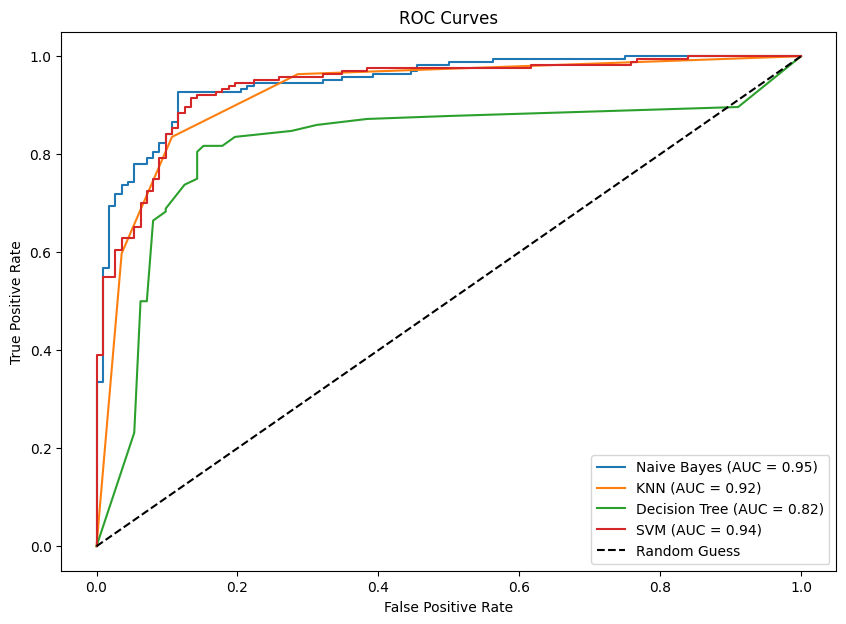

In [18]:
# Compute ROC curves and AUC scores
models = {'Naive Bayes': gnb, 'KNN': knn, 'Decision Tree': dt  , 'SVM' : svm}
plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


In [21]:
best_model = gnb  # Replace this with the best-performing model
sample = X_test_scaled.iloc[2]
predicted_class = best_model.predict([sample])[0]
print(f"The predicted class for the third sample is: {predicted_class}")


The predicted class for the third sample is: 1


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
